In [ ]:
# import numpy as np
# from scipy.sparse import load_npz
# import os

# family_counts = {}
# # Load the .npz file
# for year in range(2013, 2025):
#     data_dir_train = f'/home/shared-datasets/Feature_extraction/npz_yearwise_Final/{year}_meta_train.npz'
#     data_dir_test = f'/home/shared-datasets/Feature_extraction/npz_yearwise_Final/{year}_meta_test.npz'

#     if os.path.exists(data_dir_train) and os.path.exists(data_dir_test):
#         data_train = np.load(data_dir_train, allow_pickle=True)
#         data_test = np.load(data_dir_test, allow_pickle=True)
        
#         # Ensure keys exist in both train and test data before concatenating
#         common_keys = set(data_train.keys()).intersection(data_test.keys())
#         data_family = {key: np.concatenate((data_train[key], data_test[key]), axis=0) for key in common_keys}
#         # Extract the 'family' array from the data_family variable
#         families = data_family['family']
        
#         # Count the occurrences of each family
#         for family in np.unique(families):
#             if family == '-' or family == 'UNKNOWN':
#                 continue
#             count = np.sum(families == family)
#             if family not in family_counts:
#                 family_counts[family] = 0
#             family_counts[family] += count

## Get the top 100 families

In [5]:
# # Sort families by count in descending order and get the top 100
# top_100_families = sorted(family_counts.items(), key=lambda x: x[1], reverse=True)[:100]

# # Extract only the family names
# top_100_family_names = [family[0] for family in top_100_families]

# # Save the family names to a text file
# with open('/home/ihossain/ISMAIL/Datasets/data/CDD/results/lambda_top_100_families.txt', 'w') as file:
#     for family_name in top_100_family_names:
#         file.write(f"{family_name}\n")

In [6]:
# Read the top 100 families from the text file
file_path = '/home/ihossain/ISMAIL/Datasets/data/CDD/results/lambda_top_100_families.txt'
with open(file_path, 'r') as file:
    target_families = [line.strip() for line in file.readlines()]

In [7]:
import numpy as np
from scipy.sparse import load_npz
import os

family_year_indices = {}
# Load the .npz file
for year in range(2013, 2025):
    data_dir_train = f'/home/shared-datasets/Feature_extraction/npz_yearwise_Final/{year}_meta_train.npz'
    data_dir_test = f'/home/shared-datasets/Feature_extraction/npz_yearwise_Final/{year}_meta_test.npz'

    if os.path.exists(data_dir_train) and os.path.exists(data_dir_test):
        data_train = np.load(data_dir_train, allow_pickle=True)
        data_test = np.load(data_dir_test, allow_pickle=True)
        
        # Ensure keys exist in both train and test data before concatenating
        common_keys = set(data_train.keys()).intersection(data_test.keys())
        data_family = {key: np.concatenate((data_train[key], data_test[key]), axis=0) for key in common_keys}
        # Extract the 'family' array from the data_family variable
        families = data_family['family']

        # Find the indices where the families match the target list
        for i, family in enumerate(families): 
            if family in target_families:
                if family not in family_year_indices:
                    family_year_indices[family] = {}
                if year not in family_year_indices[family]:
                    family_year_indices[family][year] = []
                family_year_indices[family][year].append(i)
        


In [8]:
family_features = {}
for family in target_families:
    family_features[family] = []
    for year in range(2013, 2025):
        train_data_dir = f'/home/shared-datasets/Feature_extraction/npz_yearwise_Final/{year}_X_train.npz'
        test_data_dir = f'/home/shared-datasets/Feature_extraction/npz_yearwise_Final/{year}_X_test.npz'
        if os.path.exists(train_data_dir) and os.path.exists(test_data_dir):
            train_data_X = load_npz(train_data_dir).toarray()
            test_data_X = load_npz(test_data_dir).toarray()
            data_X = np.concatenate((train_data_X, test_data_X), axis=0)

            if year not in family_year_indices[family]:
                continue
            indices = family_year_indices[family][year]
            family_features[family].append(data_X[indices])


In [27]:
family_features2 = {}
for family in family_features.keys():
    print(f'family {family} {len(family_features[family])}')
    family_features2[family] = np.vstack(family_features[family])

family dowgin 10
family kuguo 10
family airpush 11
family smsreg 11
family dnotua 11
family gappusin 10
family revmob 10
family leadbolt 10
family adwo 10
family youmi 10
family inmobi 10
family plankton 11
family zdtad 8
family domob 10
family hiddad 10
family ewind 11
family frmy 7
family baiduprotect 8
family droidkungfu 9
family utchi 7
family admogo 10
family autoins 10
family wooboo 9
family smspay 11
family umpay 11
family kyview 10
family fakeapp 11
family igexin 10
family ginmaster 10
family feiwo 7
family skymobi 10
family anydown 9
family smssend 10
family fakeinst 10
family tapcore 8
family datacollector 6
family viser 10
family mobwin 10
family apptrack 9
family triada 9
family wapron 8
family swizzor 8
family mobidash 10
family frla 4
family fakeflash 8
family shedun 8
family wkload 8
family frupi 9
family systemmonitor 8
family utilcode 5
family ganlet 8
family minimob 8
family pushad 7
family scamapp 9
family nandrobox 8
family dianjin 11
family gumen 8
family hypay 7
f

In [28]:

for family in family_features2.keys():
    print(f'family {family} {len(family_features2[family])}')

family dowgin 32475
family kuguo 20966
family airpush 18086
family smsreg 15114
family dnotua 10171
family gappusin 9036
family revmob 6873
family leadbolt 6589
family adwo 6096
family youmi 5021
family inmobi 4674
family plankton 3684
family zdtad 2986
family domob 2772
family hiddad 2585
family ewind 2057
family frmy 1924
family baiduprotect 1736
family droidkungfu 1677
family utchi 1634
family admogo 1531
family autoins 1422
family wooboo 1393
family smspay 1349
family umpay 1301
family kyview 1290
family fakeapp 1249
family igexin 1180
family ginmaster 1052
family feiwo 1042
family skymobi 1021
family anydown 944
family smssend 911
family fakeinst 899
family tapcore 880
family datacollector 855
family viser 770
family mobwin 719
family apptrack 717
family triada 688
family wapron 688
family swizzor 684
family mobidash 657
family frla 645
family fakeflash 633
family shedun 594
family wkload 588
family frupi 565
family systemmonitor 551
family utilcode 549
family ganlet 522
family mi

In [29]:
import numpy as np

# Calculate family sizes
family_sizes = [len(features) for features in family_features2.values()]

# Calculate statistics
min_size = np.min(family_sizes)
max_size = np.max(family_sizes)
mean_size = np.mean(family_sizes)
median_size = np.median(family_sizes)

# Print the results
print(f"Min family size: {min_size}")
print(f"Max family size: {max_size}")
print(f"Mean family size: {mean_size}")
print(f"Median family size: {median_size}")

Min family size: 186
Max family size: 32475
Mean family size: 1984.9
Median family size: 535.5


In [10]:
# Create a dictionary to store the split data
family_data_splits = {}

# Iterate through each family in family_features2
for family, features in family_features2.items():
    # Split the features into 10 equal groups
    splits = np.array_split(features, 10)
    family_data_splits[family] = splits

# Example: Access the splits for a specific family
print(f"Number of splits for 'droidkungfu': {len(family_data_splits['droidkungfu'])}")


Number of splits for 'droidkungfu': 10


## Calculate the Stability scores

In [11]:
def calculate_jaccard_similarity(set1, set2):
    """
    Calculate Jaccard similarity between two sets.
    """
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Initialize a dictionary to store Jaccard similarity results
jaccard_results = {}

# Iterate over each family in family_data_splits
for family, feature_groups in family_data_splits.items():
    jaccard_scores = []
    for i in range(len(feature_groups) - 1):
        # Convert feature arrays to sets
        set1 = set(map(tuple, feature_groups[i]))
        set2 = set(map(tuple, feature_groups[i + 1]))
        
        # Calculate Jaccard similarity
        jaccard_score = calculate_jaccard_similarity(set1, set2)
        jaccard_scores.append(jaccard_score)
    
    # Store the results for the family
    jaccard_results[family] = jaccard_scores

# Display the Jaccard similarity results
for family, scores in jaccard_results.items():
    print(f"Jaccard similarity for family '{family}': {scores}")

Jaccard similarity for family 'dowgin': [0.13157305884985454, 0.12992732878220656, 0.011137057661217892, 0.04102920723226704, 0.03916811091854419, 0.042165538781884435, 0.03983994432846207, 0.004592828122239887, 0.034170285067019066]
Jaccard similarity for family 'kuguo': [0.0989566866898514, 0.0880522713130056, 0.022050716648291068, 0.04097924427887174, 0.016499864755206924, 0.0935672514619883, 0.10748256182625238, 0.09837601499063085, 0.017543859649122806]
Jaccard similarity for family 'airpush': [0.1491063029162747, 0.14857142857142858, 0.10347826086956521, 0.07380373073803731, 0.09573145462080399, 0.05656208572691118, 0.1206896551724138, 0.0918918918918919, 0.035214664737095995]
Jaccard similarity for family 'smsreg': [0.0490360435875943, 0.023603461841070025, 0.022185014650481373, 0.09561940650023551, 0.08450067781292363, 0.029782359679266894, 0.02945619335347432, 0.02008336491095112, 0.028916544655929723]
Jaccard similarity for family 'dnotua': [0.16666666666666666, 0.23809523809

In [12]:
import json


file_path = '/home/ihossain/ISMAIL/Datasets/data/results/lamda_feature_space_jaccard_scores.json'

# Convert numpy arrays to lists before JSON serialization
json_serializable_results = {}
for family, scores in jaccard_results.items():
    json_serializable_results[family] = scores  # Convert numpy array to list

# Save the converted dictionary to a JSON file
with open('/home/ihossain/ISMAIL/Datasets/data/results/lamda_feature_space_jaccard_scores.json', 'w') as json_file:
    json.dump(json_serializable_results, json_file, indent=4)

/tmp/ipykernel_64433/2973015884.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(jaccard_values, labels=jaccard_results.keys(), vert=True, boxprops=dict(linewidth=2), medianprops=dict(linewidth=2.5))


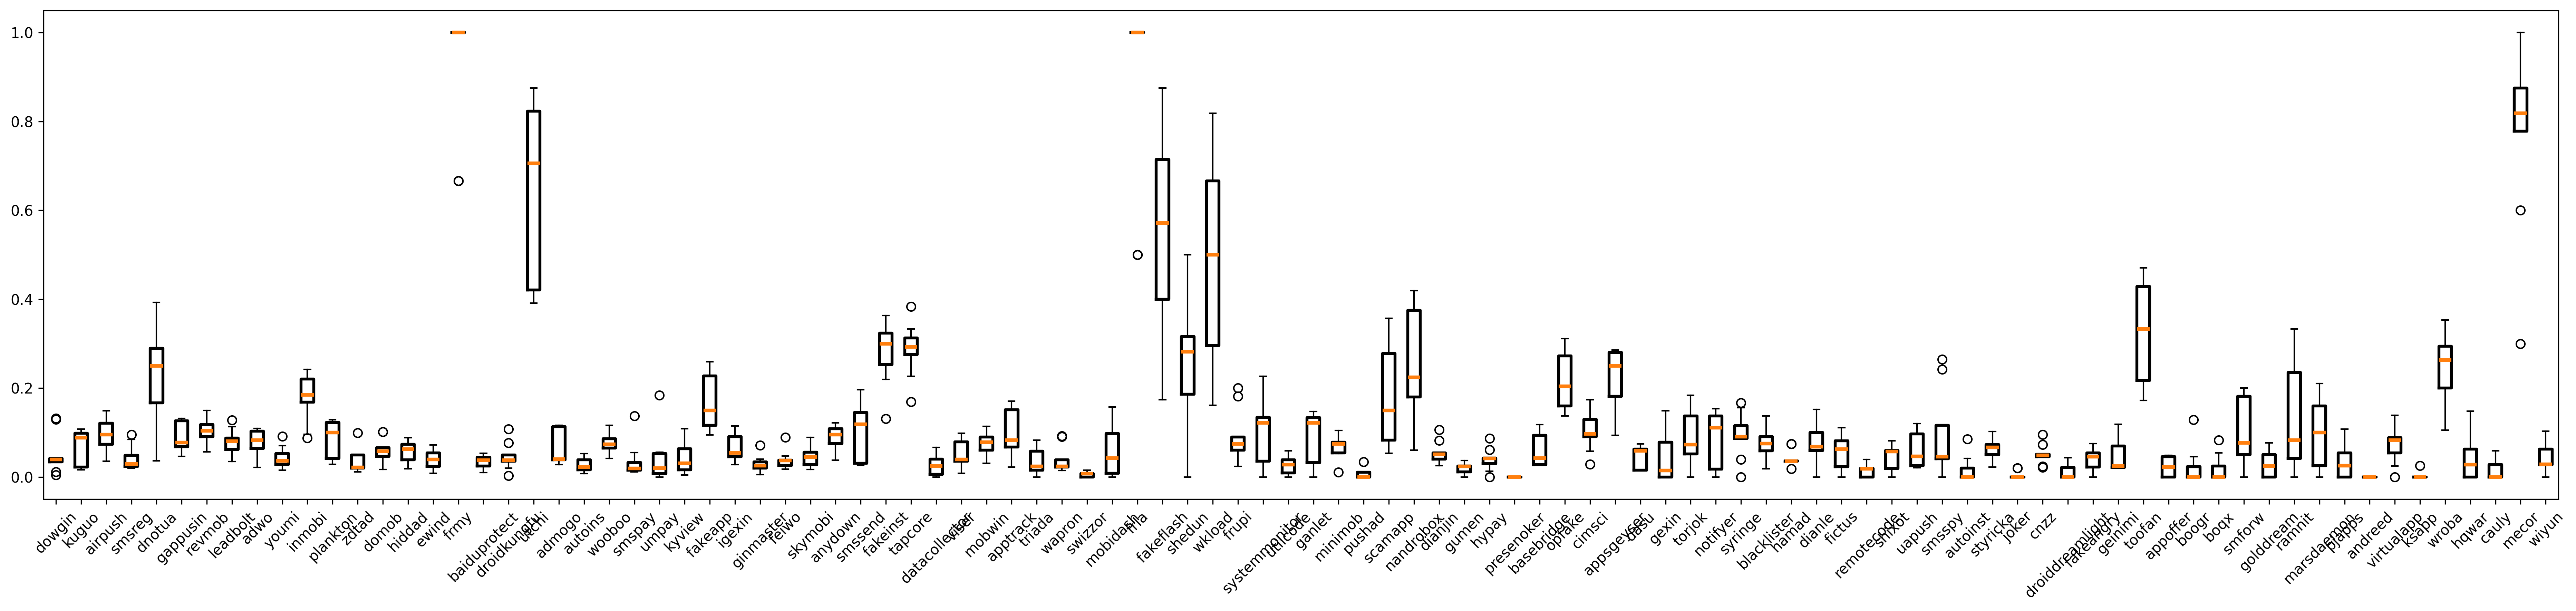

In [13]:
import matplotlib.pyplot as plt

# Prepare data for the box plot
jaccard_values = list(jaccard_results.values())

# Create the box plot
plt.figure(figsize=(25, 6), dpi=300)
plt.boxplot(jaccard_values, labels=jaccard_results.keys(), vert=True, boxprops=dict(linewidth=2), medianprops=dict(linewidth=2.5))
# plt.title("Jaccard Similarity Box Plot")
# plt.xlabel("Families")
# plt.ylabel("Jaccard Similarity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("/home/ihossain/ISMAIL/AZ-Data-Processor/Concept-Drift/experiment/plots/jaccard_similarity_boxplot.png", dpi=300, bbox_inches='tight')
# plt.savefig("/home/ihossain/ISMAIL/AZ-Data-Processor/Concept-Drift/experiment/plots/jaccard_similarity_boxplot.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.close()  # Ensure the figure is closed after saving to avoid blank output

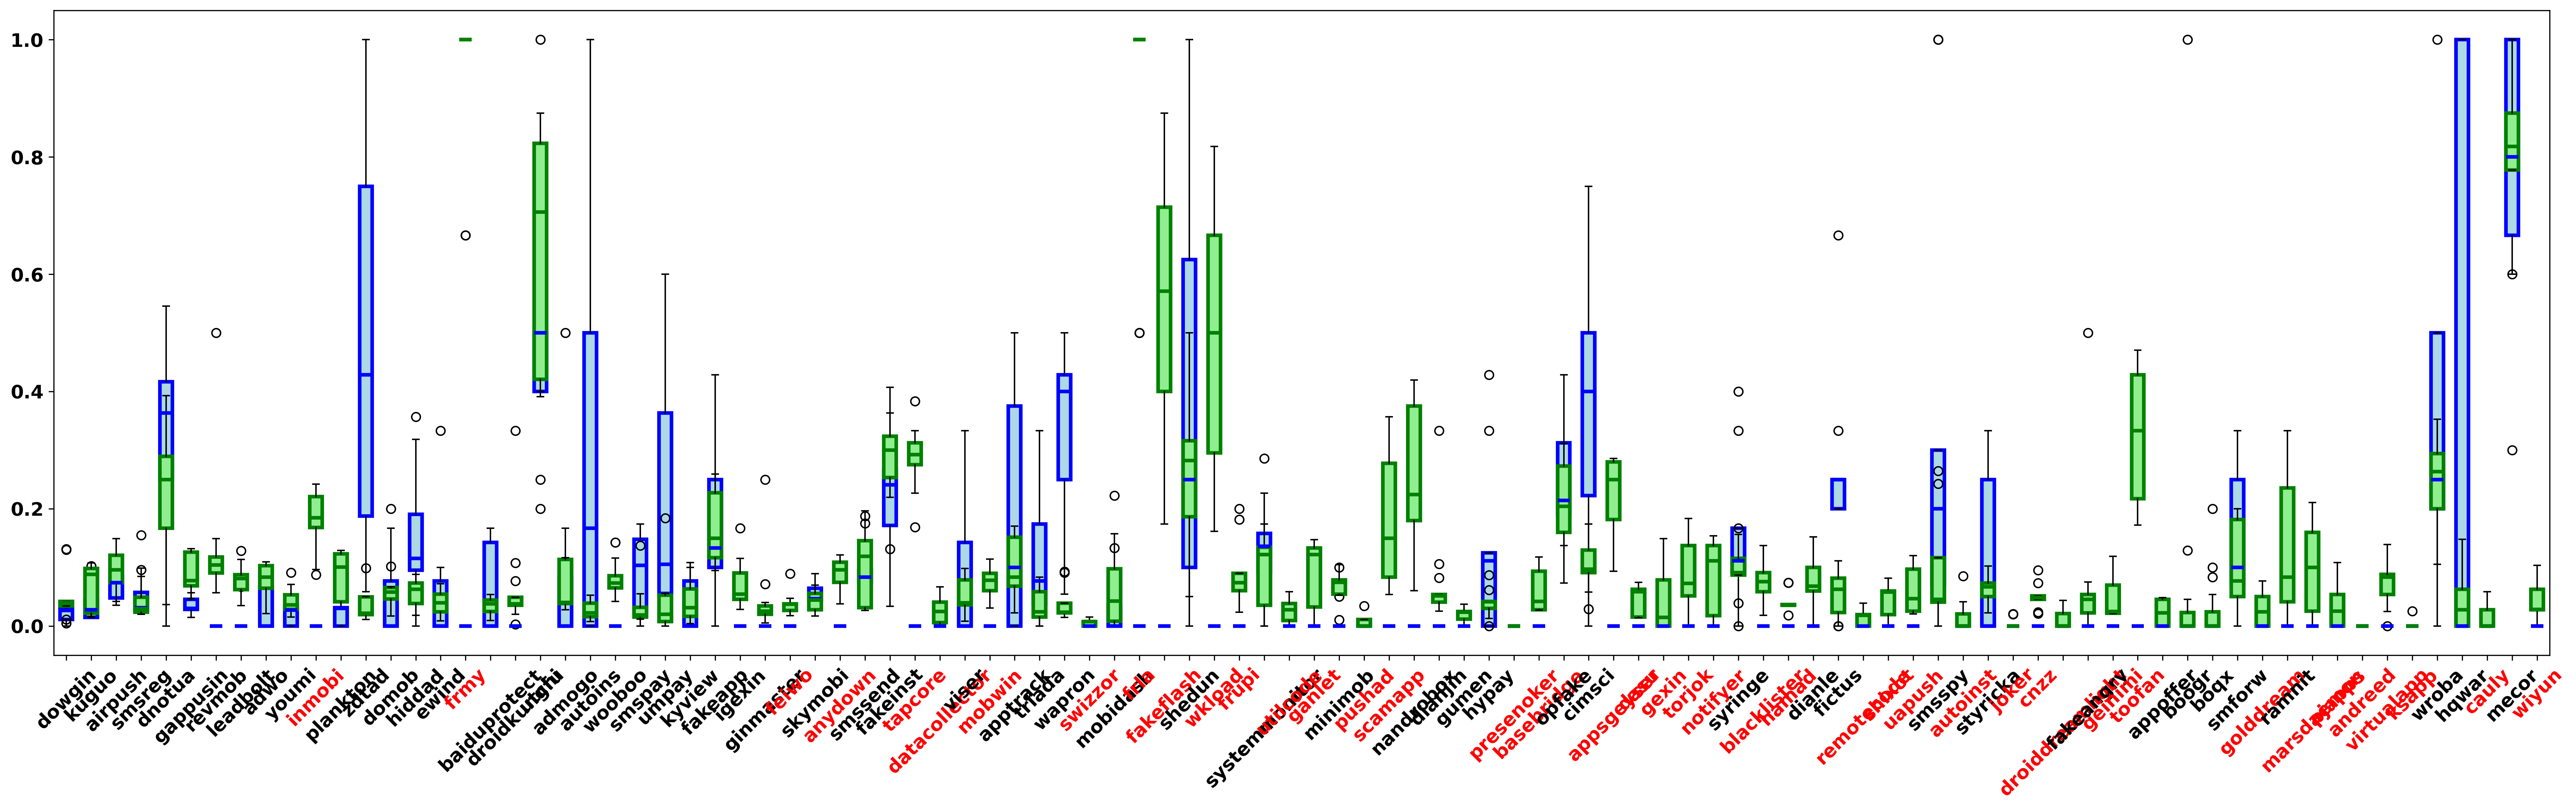

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np

# File paths
file1 = '/home/ihossain/ISMAIL/Datasets/data/results/apiGraph_feature_space_jaccard_score.json'
file2 = '/home/ihossain/ISMAIL/Datasets/data/results/lamda_feature_space_jaccard_scores.json'

# Load data from both JSON files
with open(file1, 'r') as f1, open(file2, 'r') as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

# Find common families in both results
common_families = set(data1.keys()).intersection(set(data2.keys()))

# Convert keys to a list for indexing
data2_keys = list(data2.keys())

# Prepare data for box plots
data1_values = [data1[family] if family in common_families else [0] for family in data2_keys]
data2_values = [data2[family] for family in data2_keys]

# Create box plots
plt.figure(figsize=(25, 8), dpi=300)

# Plot the boxplots for data1 and data2
plt.boxplot(data1_values, positions=np.arange(len(data2_keys)), widths=0.5, 
           patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue',linewidth=2.5), 
           medianprops=dict(color='blue', linewidth=2.5))

plt.boxplot(data2_values, positions=np.arange(len(data2_keys)), widths=0.5, 
           patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green',linewidth=2.5), 
           medianprops=dict(color='green', linewidth=2.5))

# Create labels with different colors
# labels = [f"{label}" if label in common_families else f"{label} (not common)" 
#          for label in data2_keys]

# Set x-axis ticks and labels
plt.xticks(np.arange(len(data2_keys)), data2_keys, rotation=45)

# Color the labels individually
ax = plt.gca()
for i, label in enumerate(ax.get_xticklabels()):
    label.set_color('black' if data2_keys[i] in common_families else 'red')

# Customize the plot
# plt.xlabel("Families")
# plt.ylabel("Jaccard Similarity")
plt.tight_layout()
plt.show()

In [15]:
len(common_families)

58

## Optimal Transport Dataset Distance Analysis

In [16]:
from sentence_transformers import SentenceTransformer
import numpy as np
import ot

# Initialize the SentenceTransformer model
# model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight but effective

def calculate_ot(family_data_splits, family):
    """
    Calculate the Optimal Transport (OT) distance between two sets of features for a given family and years.

    Args:
        family_features (dict): Dictionary containing features for each family and year.
        family (str): The family name to calculate OT distance for.
        year1 (int): The first year to compare.
        year2 (int): The second year to compare.

    Returns:
        float: The OT distance between the two sets of features.
    """
    ot_distance = []
    for i in range(len(family_data_splits[family])-1):
        # Extract features for the specified family and years
        A = family_data_splits[family][i]
        B = family_data_splits[family][i+1]

        # Convert features to embeddings
        # embeddings1 = model.encode(features1)
        # embeddings2 = model.encode(features2)

        # Uniform weights for OT calculation
        a = np.ones((len(A),)) / len(A)
        b = np.ones((len(B),)) / len(B)

        # Compute the ground cost matrix (Euclidean distance between embeddings)
        cost_matrix = ot.dist(A, B, metric='hamming')

        # Compute the OT distance
        ot_distance.append(ot.emd2(a, b, cost_matrix))

    return ot_distance

# Example usage
# family = 'droidkungfu'
# year1 = 2012
# year2 = 2013
# ot_distance = calculate_ot(family_features, family, year1, year2)
# print(f"Optimal Transport Distance between {family} in {year1} and {year2}: {ot_distance}")


In [17]:
otd_results = {}
for family in family_data_splits.keys():
    # Example usage
    # family = 'droidkungfu'  # Replace with the desired family name
    otd_results[family] = calculate_ot(family_data_splits, family)
    # print(jaccard_results)

/home/ihossain/anaconda3/lib/python3.12/site-packages/ot/lp/__init__.py:630: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


In [18]:
for family in family_data_splits.keys():
    print(otd_results[family])

[0.0022604772957274775, 0.0024382130355563828, 0.005559557741096891, 0.002861255147788733, 0.002883209132159951, 0.002808927499365768, 0.0028420817435107905, 0.0066242314849583065, 0.005181515435258827]
[0.002801529878925188, 0.002961288701653227, 0.005534785863058876, 0.0031926671536801486, 0.005632962260010202, 0.002952717651349099, 0.002662278594991381, 0.003023790316506842, 0.009816047438371452]
[0.002642637139523465, 0.002645545931091459, 0.004962034816053481, 0.005305878219320218, 0.0037901554130974945, 0.009269043248375306, 0.0078100595079871596, 0.010866101208204205, 0.014212212816239255]
[0.006478320334930706, 0.008495218838345326, 0.010260820691647238, 0.007460858056127334, 0.00759235314628338, 0.009829691521838449, 0.012441249734643464, 0.013621515014283226, 0.007677528425254174]
[0.0004903883866475494, 0.00020308127325490766, 0.0002789672692057861, 0.0002934114786623454, 0.00024123985644611636, 0.00028026078050040335, 0.0002278735730684048, 0.002079103820881453, 0.008971794

In [19]:
import pandas as pd
# Convert to DataFrame for easier plotting
df = pd.DataFrame(otd_results).T  # Transpose to get families as rows

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import glob
 
# Global font settings
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

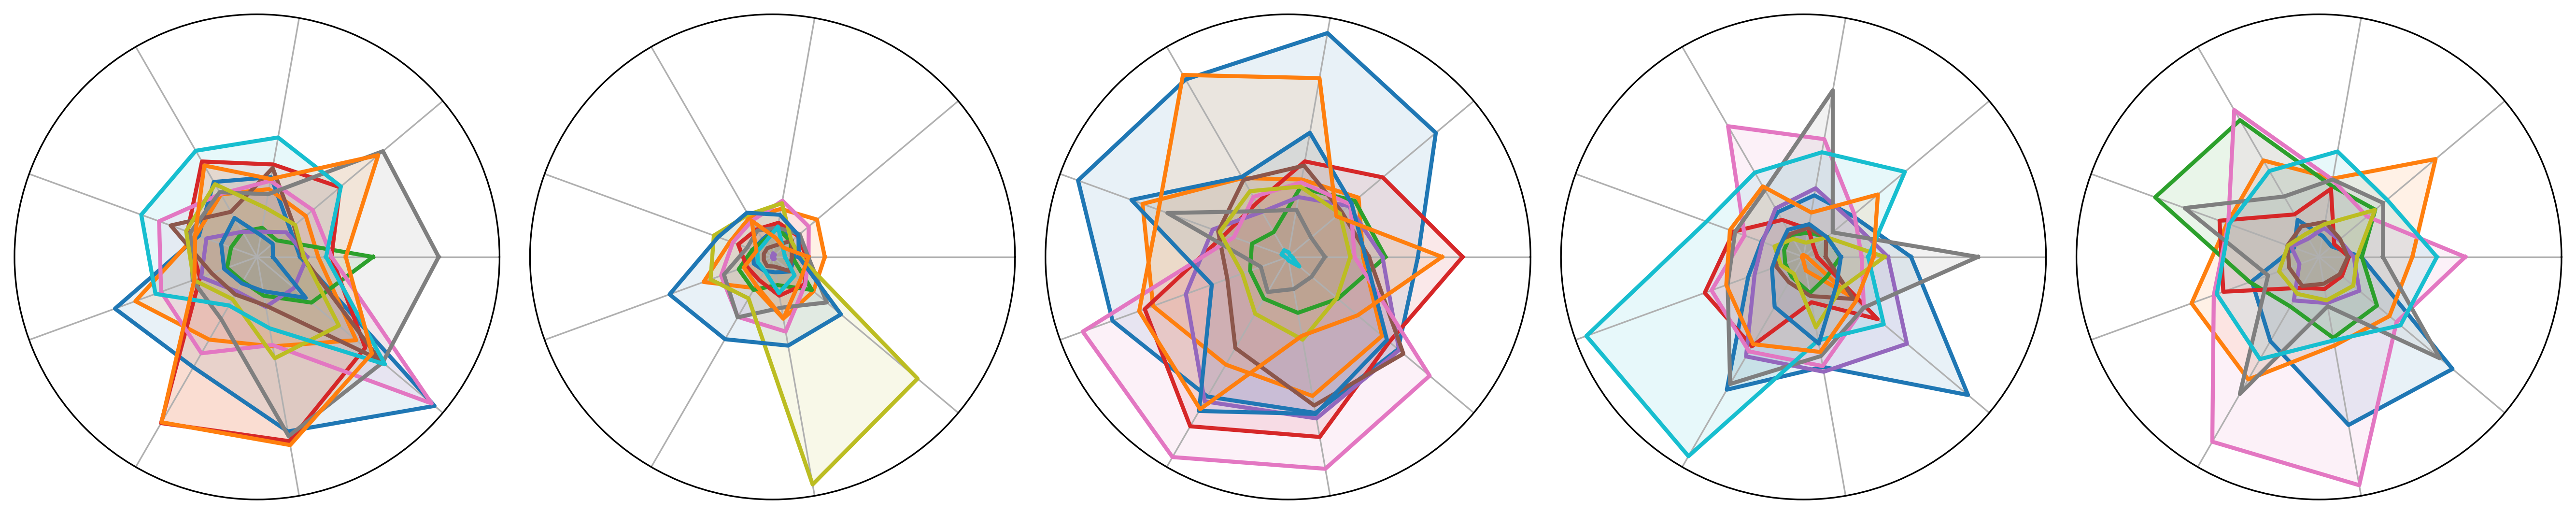

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

families = list(data1.keys()) #list(family_data_splits.keys())
# Group the families into 6 groups, each containing 10 families
grouped_families = [families[i:i + 12] for i in range(0, len(families), 12)]

# Feature labels
labels = df.columns.tolist()
num_features = len(labels)

# Create angle values for each axis
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # repeat the first angle to close the circle

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 12), subplot_kw={'projection': 'polar'}, dpi=300)
axes = axes.flatten()

for idx, families in enumerate(grouped_families[0:5]):  # Limit to 6 groups
    ax = axes[idx]
    for family in families:
        if family in df.index:
            values = df.loc[family].tolist()
            values += values[:1]  # close the loop
            ax.plot(angles, values, label=family, linewidth=2)
            ax.fill(angles, values, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])  # Remove the labels
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [22]:
data1.keys()

dict_keys(['airpush', 'plankton', 'fakeinst', 'youmi', 'opfake', 'kuguo', 'adwo', 'smssend', 'gappusin', 'boqx', 'nandrobox', 'domob', 'wooboo', 'umpay', 'leadbolt', 'viser', 'utchi', 'droidkungfu', 'smsreg', 'ginmaster', 'fakeangry', 'dowgin', 'kyview', 'revmob', 'dianjin', 'igexin', 'dianle', 'smsspy', 'smforw', 'skymobi', 'minimob', 'wroba', 'gumen', 'mecor', 'admogo', 'ewind', 'systemmonitor', 'dnotua', 'appoffer', 'fakeapp', 'cimsci', 'zdtad', 'mobidash', 'apptrack', 'shedun', 'triada', 'fictus', 'smspay', 'ramnit', 'autoins', 'boogr', 'wapron', 'styricka', 'baiduprotect', 'syringe', 'hiddad', 'hqwar', 'hypay'])

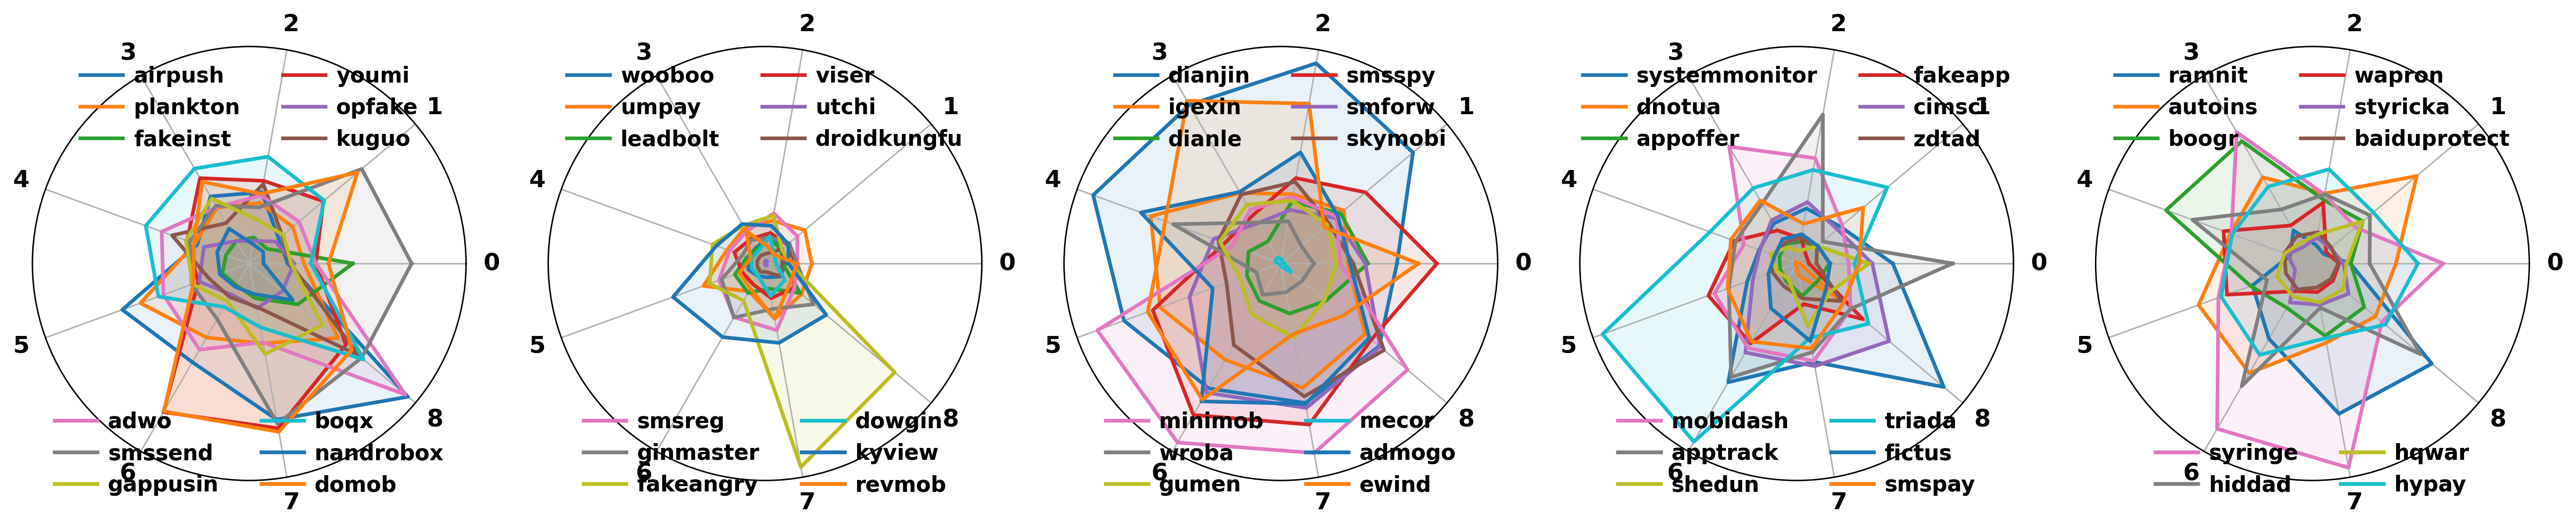

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

families = list(data1.keys()) #list(family_data_splits.keys())
# Group the families into 6 groups, each containing 10 families
grouped_families = [families[i:i + 12] for i in range(0, len(families), 12)]

# Feature labels
labels = df.columns.tolist()
num_features = len(labels)

# Create angle values
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(22, 10), subplot_kw={'projection': 'polar'}, dpi=300)
axes = axes.flatten()

for idx, families in enumerate(grouped_families[0:5]):  # Limit to 5 groups
    ax = axes[idx]
    handle_list = []
    label_list = []

    for family in families:
        if family in df.index:
            values = df.loc[family].tolist()
            values += values[:1]
            line, = ax.plot(angles, values, label=family, linewidth=2)
            ax.fill(angles, values, alpha=0.1)
            handle_list.append(line)
            label_list.append(family)

    ax.set_xticks(angles[:-1])

    # Show 6 feature labels on top and bottom only
    new_labels = []
    for i, lbl in enumerate(labels):
        if i < 6 or i >= (num_features - 6):
            new_labels.append(lbl)
        else:
            new_labels.append('')
    ax.set_xticklabels(new_labels)

    ax.set_yticks([])

    # Split families into two groups: first 6 and last 6
    handles_upper = handle_list[:6]
    labels_upper = label_list[:6]
    handles_lower = handle_list[6:]
    labels_lower = label_list[6:]

    # Add upper center legend (first 6 families)
    leg1 = ax.legend(handles=handles_upper, labels=labels_upper,
                     loc='upper center', bbox_to_anchor=(0.5, 1.0),
                     ncol=2, frameon=False, fontsize='small', handletextpad=0.5)

    # Add lower center legend (last 6 families)
    leg2 = ax.legend(handles=handles_lower, labels=labels_lower,
                     loc='lower center', bbox_to_anchor=(0.5, -0.08),
                     ncol=2, frameon=False, fontsize='small', handletextpad=0.5)

    # Set legends manually to not interfere with tight_layout
    ax.add_artist(leg1)
    ax.add_artist(leg2)

# Layout adjustment
plt.tight_layout(rect=[0.05, 0.1, 0.95, 0.95])

plt.show()


## New, Existing, Unknown, Toatal Malware, Valid Family, Singleton Count

In [ ]:
import numpy as np
from scipy.sparse import load_npz
import os

year_singleton = {}
year_families = {}
total_malwares = {}
valid_families = {}
unkwon_families = {}

# Load the .npz file
dir_path = "/home/shared-datasets/Feature_extraction/npz_yearwise_Final_rerun_0.001__"
for year in range(2013, 2026):
    data_dir_train = f'{dir_path}/{year}_meta_train.npz'
    data_dir_test = f'{dir_path}/{year}_meta_test.npz'

    if os.path.exists(data_dir_train) and os.path.exists(data_dir_test):
        data_train = np.load(data_dir_train, allow_pickle=True)
        data_test = np.load(data_dir_test, allow_pickle=True)
        
        # Ensure keys exist in both train and test data before concatenating
        common_keys = set(data_train.keys()).intersection(data_test.keys())
        data_family = {key: np.concatenate((data_train[key], data_test[key])) for key in common_keys}
        
        # Extract the 'family' array from the data_family variable
        families = data_family['family']

        # Filter the families that do not start with "singleton" and do not contain "benign"
        filtered_families = [family for family in families if not family.startswith("singleton") and not family.startswith('SINGLETON') \
                            and not family.startswith("UNKNOWN") and not family.startswith("unknown") and not family.startswith("-")  \
                                and "benign" not in family]
        
        total_malwares[year] = len([family for family in families if "benign" not in family])
        valid_families[year] = len(np.unique(filtered_families))
        # Count the number of families starting with "singleton"
        year_singleton[year] = len([family for family in families if family.startswith("singleton") or family.startswith("SINGLETON")])
        # Count the unknown families
        unkwon_families[year] = len([family for family in families if family.startswith("UNKNOWN") or  family.startswith("unknown") or \
                                     family.startswith("-")])
        # Store the filtered families for the year
        year_families[year] = np.unique(filtered_families)


In [ ]:
total_families = 0
for year in year_families.keys():
    total_families += len(year_families[year])
    print(f'year: {year}, unique families: {len(year_families[year])}')

print("total families: ", total_families)

In [ ]:
# Extract years and families
years = sorted(year_families.keys())
new_families_count = []
existing_families_count = []

# Initialize the first year
new_families_count.append(len(year_families[2013]))
existing_families_count.append(0)

# Calculate the number of new and existing families each year compared to the previous year
for i in range(1, len(years)):
    arrays1 = []
    arrays2 = []
    for j in range(0, i):
        arrays1.append(year_families[years[j]])
        # arrays2.append(year_families[years[j]])

    arrays2.append(year_families[years[i]])

    previous_year_families = np.concatenate(arrays1)
    current_year_families = np.concatenate(arrays2)

    A = set(previous_year_families)
    B = set(current_year_families)

    new_families = B.difference(A)
    existing_families = B.intersection(A)
    new_families_count.append(len(new_families))
    existing_families_count.append(len(existing_families))

In [ ]:
for i, year in enumerate(range(2013, 2026)):
    if year == 2015:
        years.insert(i, year)
        new_families_count.insert(i, 0)
        existing_families_count.insert(i, 0)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import glob
 
# Global font settings
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(8, 4))
bars1 = plt.bar(years, existing_families_count, label='Existing Families', color='#1f77b4', edgecolor='black')
bars2 = plt.bar(years, new_families_count, bottom=existing_families_count, label='New Families', color='#ff7f0e', edgecolor='black')

# Add counts inside each bar
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        if bar == bars1[-1]:
            plt.text(bar.get_x() + bar.get_width() / 2, height / 2 + 15, str(int(height)), ha='center', va='center', fontsize=10, color='black')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, height / 2, str(int(height)), ha='center', va='center', fontsize=10, color='white')

# Add count on top of the last bar if it's too small
last_bar = bars2[-1]
last_height = last_bar.get_height()
if last_height > 0 and last_height < 10:  # Adjust threshold as needed
    plt.text(last_bar.get_x() + last_bar.get_width() / 2, last_height + 30, str(int(last_height)), ha='center', va='bottom', fontsize=10, color='black')

for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    total_height = height1 + height2
    if bar2 == last_bar and last_height > 0 and last_height < 10:  # Adjust threshold as needed
        plt.text(bar2.get_x() + bar2.get_width() / 2, total_height + 50, str(int(total_height)), ha='center', va='bottom', fontsize=10, color='black')
    else:
        if height2 > 0:
            plt.text(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2, str(int(height2)), ha='center', va='center', fontsize=10, color='white')
        
        if total_height > 0:
            plt.text(bar2.get_x() + bar2.get_width() / 2, total_height + 5, str(int(total_height)), ha='center', va='bottom', fontsize=10, color='black')
        
# plt.xlabel('Year', fontsize=12)
plt.ylabel('Count')
# plt.title('New and Existing Families Each Year', fontsize=14)
plt.xticks(years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
malware_info = {}
for i in range(0, len(years)):
    if years[i]==2015:
        continue
    malware_info[years[i]] = {
        "year": years[i],
        "total_mal": total_malwares[years[i]],
        "new": new_families_count[i], 
        "existing": existing_families_count[i],
        "valid_family": valid_families[years[i]],
        "singleton": year_singleton[years[i]],
        "unknown": unkwon_families[years[i]]
    }

In [ ]:
import pandas as pd

# Convert the malware_info dictionary to a DataFrame
malware_info_df = pd.DataFrame.from_dict(malware_info, orient='index')

# Save the DataFrame to a CSV file
malware_info_df.to_csv('/home/ihossain/ISMAIL/Datasets/data/CDD/results/malware_info.csv', index=False)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

years = list(malware_info.keys())
# Extract years, singleton, and unknown values
# years = list(year_singleton.keys())
singleton_values = list(year_singleton.values())
unknown_values = list(unkwon_families.values())

for i, year in enumerate(range(2013, 2026)):
    if year == 2015:
        years.insert(i, year)
        singleton_values.insert(i, 0)
        unknown_values.insert(i, 0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the width of the bars
bar_width = 0.4  # Increased bar width

# Create positions for the bars with spacing to place them next to each other
x = np.arange(len(years))
x_singleton = x - bar_width / 2  # Shift singleton bars slightly to the left
x_unknown = x + bar_width / 2   # Shift unknown bars slightly to the right

# Create the bar plot
plt.figure(figsize=(8, 3))
bars1 = plt.bar(x_singleton, singleton_values, width=bar_width, label='Singleton', color='#CC6CE7', edgecolor='black')
bars2 = plt.bar(x_unknown, unknown_values, width=bar_width, label='Unknown', color='#5DE2E7', edgecolor='black')

# Add counts above each bar
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
plt.ylabel('Count')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()